# Investigating a dataset - Udacity's Nano Degree Program

As part of the project, I have selected the curated movie database. I will try to clean, analyze, interpret and answer few questions for which the answer can be found within this particular dataset.

## Four step analysis
- Introduction - getting the initial information about the dataset (number of NAs/0s, a snapshot of the initial statistics about the dataset etc.)
- Data Cleaning - removing duplicate rows, removing movies with budget and/or revenue of 0 as we cannot infer any analysis on those
- Data Analysis - trying to answer the questions posed below.
- Conclusions

Questions:
- Which was the most profitable movie? What about the least - done
- What year was the most profitable? What about the least (on average) - done 
- What is the best month to release a movie (as in most profitable month) ? - done
- What are the main correlations between profits and other variables? Popularity, Director, Runtime, Genre, Production Company, Voting Rating? - including visuals
    - Is there a recipe for success? Based on the correlation findings, can we derive an approach to get a profitable movie? - done
- Which was the most profitable movie per genre?



## Introduction

I will firstly import what I think the main libraries needed for this project. I will add more on the way as I see fit and the changes will be reflected as I go along.

In [379]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [380]:
df = pd.read_csv('tmdb-movies.csv') # Reading the data from a csv file using the pandas functionality

In [381]:
df.shape # 10866 rows by 21 columns

(10866, 21)

In [382]:
df.head(2) # In order to see the first snapshot of the data

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [383]:
df.info() # Concise summary of type of values in the columns and how many

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [384]:
df.describe() # Initial snapshot of statistics about the data

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


There seems to be 0 values for budget, revenue, runtime, budj adj and rev adj.

## Data Cleaning 
- Remove any duplicated rows
- Remove irrelevant columns
- Adjust the 0 values for budget and revenue with values we can use
- Changing release date to datetime format

In [385]:
len(df) - len(df.drop_duplicates()) # Drop duplicates will return the value after dropping any duplicated rows. This way we can the number of dupes

1

In [386]:
df.drop_duplicates(inplace=True)
print ('After removing the duplicated rows, we should expect ' + str(df.shape[0]) + ' rows and ' + str(df.shape[1]) + ' columns')

After removing the duplicated rows, we should expect 10865 rows and 21 columns


In [387]:
df.drop(['imdb_id', 'homepage', 'tagline', 'keywords', 'overview','budget_adj', 'revenue_adj'], axis = 1, inplace=True) # Dropping few columns that I find irrelevant to the analysis 

In [388]:
df.dropna(inplace=True)

In [389]:
df.shape # As expected

(9772, 14)

In [390]:
df.query('budget == 0').count()['id'] # Incomplete information about the movie if budget is 0

4751

In [391]:
df.query('revenue == 0').count()['id'] # Incomplete information about the movie if budget is 0

5022

In [392]:
df.query('runtime == 0').count()['id'] # Incomplete information about the movie if budget is 0

13

In [393]:
#df['budget'] = df['budget'].replace(0,df['budget'].mean()) # Replacing the 0 values for budget with the mean values for the whole series
df['budget']=df['budget'].replace(0, np.nan)

In [394]:
#df['revenue'] = df['revenue'].replace(0,df['revenue'].mean()) # Replacing the 0 values for revenue with the mean values for the whole series
df['revenue']=df['revenue'].replace(0, np.nan)

In [395]:
#df['runtime'] = df['runtime'].replace(0,df['runtime'].mean()) # Replacing the 0 values for runtime with the mean values for the whole series
df['runtime']=df['runtime'].replace(0, np.nan)

In [396]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,9772.000000,9772.000000,5.021000e+03,4.750000e+03,9759.000000,9772.000000,9772.000000,9772.000000
mean,63189.640810,0.694721,3.148929e+07,9.099524e+07,103.063736,239.312014,5.963528,2000.878428
std,90718.059987,1.036931,3.920818e+07,1.632905e+08,27.641529,603.011504,0.913174,13.036794
min,5.000000,0.000188,1.000000e+00,2.000000e+00,3.000000,10.000000,1.500000,1960.000000
25%,10221.500000,0.232710,6.300000e+06,8.501551e+06,91.000000,18.000000,5.400000,1994.000000
50%,18677.500000,0.419762,1.800000e+07,3.331677e+07,100.000000,46.000000,6.000000,2005.000000
75%,70577.250000,0.776408,4.000000e+07,1.015876e+08,112.000000,173.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000


In [397]:
df['release_date'] = pd.to_datetime(df['release_date']) # Changing the release date to a datetime format, will need this to derive months
df['release_date'].head(1)

0   2015-06-09
Name: release_date, dtype: datetime64[ns]

In [398]:
df.info() # Still few empty rows for things like production companies, cast but these are not proving problematic. Will see as I progress

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 14 columns):
id                      9772 non-null int64
popularity              9772 non-null float64
budget                  5021 non-null float64
revenue                 4750 non-null float64
original_title          9772 non-null object
cast                    9772 non-null object
director                9772 non-null object
runtime                 9759 non-null float64
genres                  9772 non-null object
production_companies    9772 non-null object
release_date            9772 non-null datetime64[ns]
vote_count              9772 non-null int64
vote_average            9772 non-null float64
release_year            9772 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(3), object(5)
memory usage: 1.1+ MB


## Exploratory Data Analysis

In [399]:
df['profit'] = df['revenue'] - df['budget'] # Creating a dataframe column for profit

In [400]:
high_profit_mov = df.loc[df['profit'].idxmax(),:] # Using loc functionality to get the row where profit is max
low_profit_mov = df.loc[df['profit'].idxmin(),:] # Same as above

In [401]:
# Q1: Which was the most profitable movie? What about the least? 
print ('The most profitable movie was: ' + str(high_profit_mov['original_title']))
print ('The least profitable movie was: ' + str(low_profit_mov['original_title']))

The most profitable movie was: Avatar
The least profitable movie was: The Warrior's Way


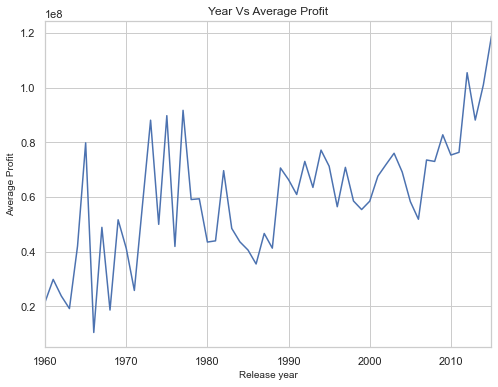

In [402]:
#Group the data according to their release year and take the average profit and plot.
av_profit_df = df.groupby('release_year')['profit'].mean().plot(figsize = (8,6))

# Titles and labels
plt.xlabel('Release year', fontsize = 10)
plt.ylabel('Average Profit', fontsize = 10)
plt.title('Year Vs Average Profit', fontsize = 12)

#set the style sheet
sns.set_style('whitegrid')

In [403]:
high_profit_year = df.groupby('release_year')['profit'].mean().idxmax() # Using same functionality with idxmax/idxmin we can get the values for the most and least profitable years
low_profit_year = df.groupby('release_year')['profit'].mean().idxmin()

In [404]:
print ("The most profitable year on average was: " + str(high_profit_year) + ". Whereas, the least profitable movie was: " + str(low_profit_year))

The most profitable year on average was: 2015. Whereas, the least profitable movie was: 1966


In [405]:
# In order to answer Q3 we need to get a new column for months

# Using dt.month we get a number assigned from 1-12 (months) per each release date
month_released = df['release_date'].dt.month 

# Defining a list of months
months = ['Jan', 'Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

# Creating a new dataframe in which we store the month of the release based on the above series created
month_released = pd.DataFrame(month_released)
# Renaming the column
month_released.rename(columns = {'release_date': 'released_month'}, inplace=True)
# Getting the values for revenue from the original df 
month_released['revenue'] = df['revenue']
# Create a new variable in which we store the mean value for revenue per each release month
mean_revenue = month_released.groupby('released_month').mean()
# Assining the list of months as a column
mean_revenue['month'] = months

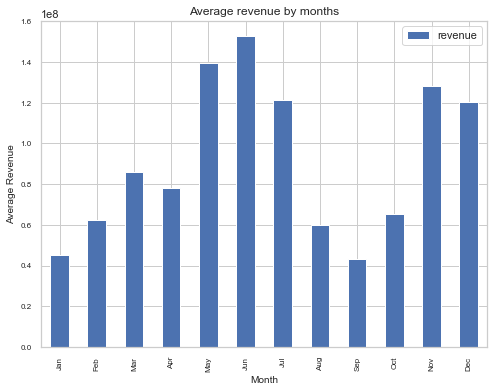

In [406]:
# Plotting the findings
mean_revenue.plot(x='month', kind = 'bar', figsize = (8,6), fontsize = 8)

# Titles and labels
plt.xlabel ('Month', fontsize = 10)
plt.ylabel ('Average Revenue', fontsize = 10)
plt.title ('Average revenue by months', fontsize = 12)

# Sheet style
sns.set_style ('whitegrid')

#### On average, the most profitable month to release a movie is June

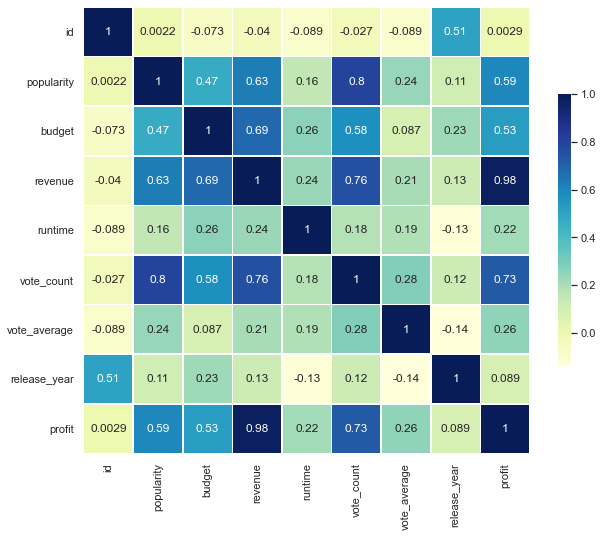

In [407]:
# Creating a correlation matrix in order to derive some initial insights I can later expand on
corr_matrix = plt.subplots(figsize = (10,10))
corr_matrix = sns.heatmap(df.corr(), annot = True, linewidths=.5, cmap="YlGnBu", square = True, cbar_kws = {'shrink' : .5}, annot_kws= {'fontsize': 12})
plt.show()

#### Strong correlation between a movie's profit and it's vote count and popularity (the revenue and budget ones are obvious)

In [408]:
# After some thinking, I thought I should do a function to do bin cuts per column level so we can easily visualise the association between one variable and different bin cuts of another variable

def cut_bins(column_name):

    min_value = df[column_name].min()
    first_quantile = df[column_name].quantile(0.25)
    second_quantile = df[column_name].quantile(0.5)
    third_quantile = df[column_name].quantile(0.75)
    max_value = df[column_name].max()
    bin_edges = [min_value, first_quantile, second_quantile, third_quantile, max_value]
    bin_names = ['low','medium','mod_high','high']

    return pd.cut(df[column_name], bin_edges, labels = bin_names, duplicates='drop')

In [409]:
df['profit_bins'] = cut_bins('profit')

Text(0.5, 1.0, 'Popularity vs Profit levels')

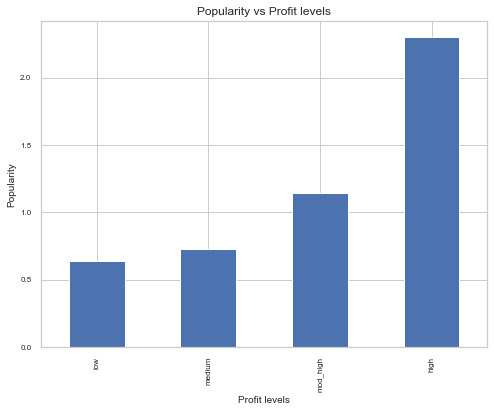

In [410]:
# Popularity vs profit relation
profit_pop = df.groupby('profit_bins')['popularity'].mean()
profit_pop.plot(kind='bar', figsize = (8,6), fontsize = 8)

# Titles and labels
plt.xlabel('Profit levels', fontsize = 10)
plt.ylabel('Popularity', fontsize = 10)
plt.title('Popularity vs Profit levels', fontsize = 12)

#### There seems to be a strong correlation between profit and the movie's popularity. Thinking about it, it makes sense as a movie that is more popular, more talked about, better marketing in place will attract more people to see it.

Text(0.5, 1.0, 'Vote counts vs Profit levels')

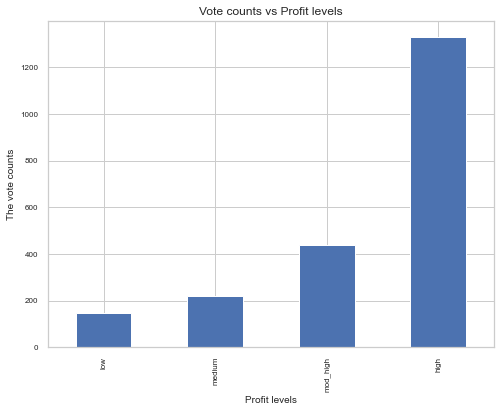

In [411]:
# Vote counts vs profit relation
profit_vote_count = df.groupby('profit_bins')['vote_count'].mean()
profit_vote_count.plot(kind='bar', figsize = (8,6), fontsize = 8)

# Titles and labels
plt.xlabel('Profit levels', fontsize = 10)
plt.ylabel('The vote counts', fontsize = 10)
plt.title('Vote counts vs Profit levels', fontsize = 12)

#### The number of votes also seem to be related to the profit levels of the movies. This is somehow linked to the above correlation, as a more popular movie will attract more viewers which in turn may give a rating to a movie. A movie with low vote counts is a movie slightly obscure and less known, therefore less profits associated with it.

## Now let's explore the correlations between actors, directors, production companies and the movies' profits

In [412]:
# Splitting the cast, genres and production companies by their delimiter to get individual values
df['cast'] = df['cast'].str.split('|', expand = True)
df['genres'] = df['genres'].str.split('|', expand = True)
df['production_companies'] = df['production_companies'].str.split('|', expand = True)

# Value counts will sort the list from biggest value to lowest value. The index represent the value name. Parsing that to a list will allow us to select most frequent cast, genre, prod company and director

cast_var = df['cast'].value_counts().index.tolist()
genres_var = df['genres'].value_counts().index.tolist()
prod_var = df['production_companies'].value_counts().index.tolist()
director_var = df['director'].value_counts().index.tolist()

# Creating a dataframe of the lists

df_pop = pd.DataFrame({
    'pop_cast' : cast_var[:5],
    'pop_genre' : genres_var[:5],
    'pop_prod' : prod_var[:5],
    'pop_director' : director_var[:5]
})

df_pop

,pop_cast,pop_genre,pop_prod,pop_director
0,Nicolas Cage,Drama,Universal Pictures,Woody Allen
1,Robert De Niro,Comedy,Paramount Pictures,Clint Eastwood
2,Bruce Willis,Action,Columbia Pictures,Steven Spielberg
3,Clint Eastwood,Horror,Twentieth Century Fox Film Corporation,Martin Scorsese
4,Johnny Depp,Adventure,Walt Disney Pictures,Ridley Scott


In [413]:
# We need the values as lists in order to query the big df
pop_cast_list = df_pop['pop_cast'].tolist()
pop_genre_list = df_pop['pop_genre'].tolist()
pop_prod_list = df_pop['pop_prod'].tolist()
pop_director_list = df_pop['pop_director'].tolist()

Text(0.5, 1.0, 'Average profit vs actors')

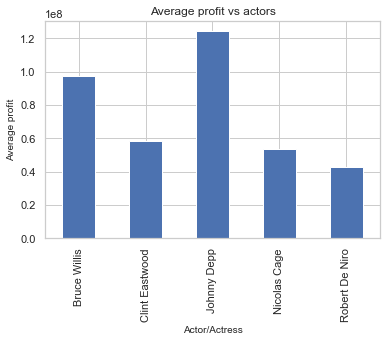

In [414]:
# Querying the most popular cast we have got in the big dataframe. We group that and get the average profit per each cast member
cast_graph = df.query('cast in @ pop_cast_list').groupby('cast')['profit'].mean()
cast_graph.plot(kind='bar')

# Title and labels
plt.xlabel('Actor/Actress', fontsize = 10)
plt.ylabel('Average profit', fontsize = 10)
plt.title('Average profit vs actors', fontsize = 12)

Text(0.5, 1.0, 'Average profit vs genres')

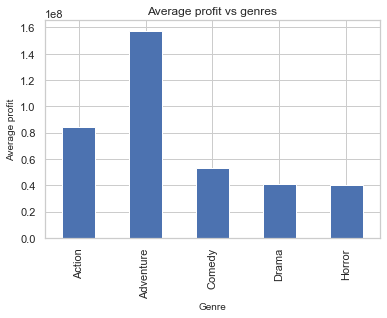

In [415]:
# Querying the most popular genres we have got in the big dataframe. We group that and get the average profit per each genre
genre_graph = df.query('genres in @ pop_genre_list').groupby('genres')['profit'].mean()
genre_graph.plot(kind='bar')

# Title and labels
plt.xlabel('Genre', fontsize = 10)
plt.ylabel('Average profit', fontsize = 10)
plt.title('Average profit vs genres', fontsize = 12)

Text(0.5, 1.0, 'Average profit vs production companies')

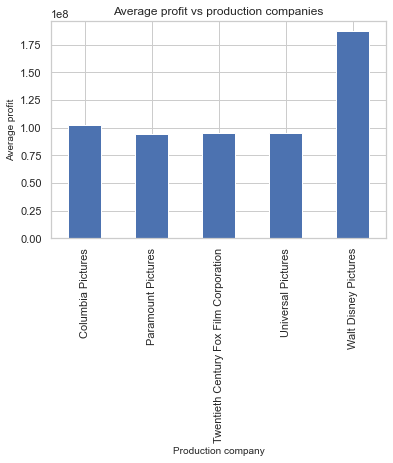

In [416]:
# Querying the most popular production companies we have got in the big dataframe. We group that and get the average profit per production company
prod_graph = df.query('production_companies in @ pop_prod_list').groupby('production_companies')['profit'].mean()
prod_graph.plot(kind='bar')
# Title and labels
plt.xlabel('Production company', fontsize = 10)
plt.ylabel('Average profit', fontsize = 10)
plt.title('Average profit vs production companies', fontsize = 12)

Text(0.5, 1.0, 'Average profit vs directors')

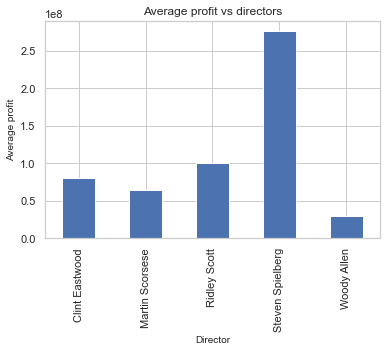

In [417]:
# Querying the most popular directors companies we have got in the big dataframe. We group that and get the average profit per directors
dir_graph = df.query('director in @ pop_director_list').groupby('director')['profit'].mean()
dir_graph.plot(kind='bar')
# Title and labels
plt.xlabel('Director', fontsize = 10)
plt.ylabel('Average profit', fontsize = 10)
plt.title('Average profit vs directors', fontsize = 12)

## Preliminary conclusions:
#### Which was the most profitable movie? What about the least: 
    Avatar and The Warrior's Way
#### What year was the most profitable? What about the least (on average)
    2015 and 1966
#### What is the best month to release a movie (as in most profitable month) ?
    June
#### What are the main correlations between profits and other variables? Popularity, Director, Runtime, Genre, Production Company, Voting Rating? - including visuals. Is there a recipe for success? Based on the correlation findings, can we derive an approach to get a profitable movie?
    Popularity and vote counts are the most correlated variables with the profits of a movie. 
    Moreover, if we look at the most popular cast members, directors, production companies and genres
    an easy recipe for success would be an Adventure movie, starring Johnny Depp, produced under the umbrella of Walt Disney and directed by Steven Spielberg
Which was the most profitable movie per genre? - tbd


Points of references used: 

https://github.com/chenxia801/TMDb-movie-data-analysis/blob/master/TMDb%20Movie%20Data%20Analysis.ipynb

https://www.kaggle.com/deepak525/investigate-tmdb-movie-dataset

https://datatofish.com/correlation-matrix-pandas/
